In [1]:
#math and statistics.
from scipy import stats
import statistics
import math

#impot matplot and seaborn for viz.
import matplotlib.pyplot as plt
import seaborn as sns

#numpy and pandas library
import numpy as np
import pandas as pd

#dataset library
from pydataset import data
import env
import acquire


import warnings 
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier




# Decision Tree Exercises
## Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

In [86]:
df = acquire.get_titanic_data()

Using cached csv


In [87]:
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


## Clean the Data 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [89]:
df = df.drop(columns = ['passenger_id','deck','embarked','class'])

In [90]:
df['sex'] = df['sex'].replace(["male",'female'], [0,1])

In [91]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone'],
      dtype='object')

In [92]:
df.age = df.age.fillna(value=df.age.median())

In [93]:
df.embark_town = df.embark_town.fillna(value="Southampton")

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embark_town  891 non-null    object 
 8   alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [95]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,0,22.0,1,0,7.2500,Southampton,0
1,1,1,1,38.0,1,0,71.2833,Cherbourg,0


In [96]:
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.survived)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.survived)

In [97]:
print(train.shape)
print(test.shape)
print(validate.shape)

(498, 9)
(179, 9)
(214, 9)


In [98]:
type(train['survived'])

pandas.core.series.Series

## Question 1: All About That Base(line)
**What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.**

In [99]:
train['baseline'] = 0

In [100]:
baseline_accurancy = (train.survived == train.baseline).mean()

In [101]:
print(f'The baseline accuracy is {baseline_accurancy:.2%}')

The baseline accuracy is 61.65%


## Question 2: Fit-Transform
**Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)**

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
np.random.seed(25)

In [104]:
#train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.survived)
# 70/30 train validate split
#train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.survived)

In [105]:
X = df[['pclass', 'age', 'sibsp', 'parch', 'fare']]
y = df.survived

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  891 non-null    int64  
 1   age     891 non-null    float64
 2   sibsp   891 non-null    int64  
 3   parch   891 non-null    int64  
 4   fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [106]:

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [107]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [108]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- pclass <= 2.50
|   |--- fare <= 13.68
|   |   |--- fare <= 7.75
|   |   |   |--- class: 0
|   |   |--- fare >  7.75
|   |   |   |--- class: 0
|   |--- fare >  13.68
|   |   |--- age <= 45.25
|   |   |   |--- class: 1
|   |   |--- age >  45.25
|   |   |   |--- class: 0
|--- pclass >  2.50
|   |--- age <= 6.50
|   |   |--- sibsp <= 2.50
|   |   |   |--- class: 1
|   |   |--- sibsp >  2.50
|   |   |   |--- class: 0
|   |--- age >  6.50
|   |   |--- age <= 32.50
|   |   |   |--- class: 0
|   |   |--- age >  32.50
|   |   |   |--- class: 0



In [109]:
y_train_str = y_train.replace({0: "unsurvived", 1: "survived"})

In [110]:
y_train_str.unique()

array(['unsurvived', 'survived'], dtype=object)

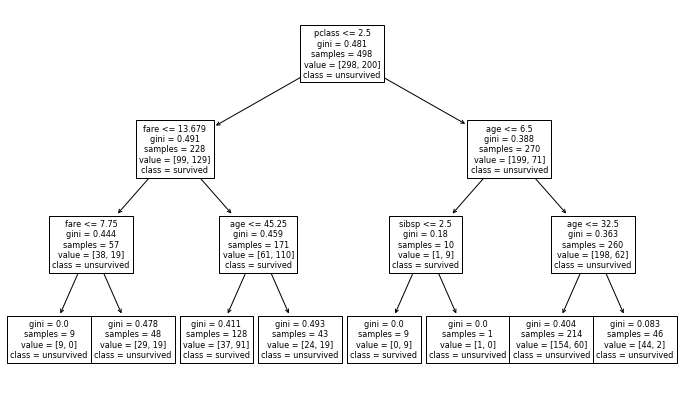

In [111]:
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names= y_train_str.unique())
plt.show()

In [112]:
tree.score(X_train, y_train)

0.7248995983935743

In [30]:
predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78        81
           1       0.58      0.48      0.53        44

    accuracy                           0.70       125
   macro avg       0.66      0.65      0.65       125
weighted avg       0.69      0.70      0.69       125



In [113]:
predictions = tree.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       170
           1       0.69      0.54      0.61        98

    accuracy                           0.74       268
   macro avg       0.73      0.70      0.71       268
weighted avg       0.74      0.74      0.73       268



## Question 3  Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [114]:
pd.DataFrame(classification_report(actual, predictions,
                      output_dict=True)).T

,precision,recall,f1-score,support
0,0.764398,0.858824,0.808864,170.000000
1,0.688312,0.540816,0.605714,98.000000
accuracy,0.742537,0.742537,0.742537,0.742537
macro avg,0.726355,0.699820,0.707289,268.000000
weighted avg,0.736575,0.742537,0.734578,268.000000


## Question 4,  Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [115]:
from sklearn.metrics import confusion_matrix


In [116]:
# confusion matrix - actual on left, predicted on top
pd.DataFrame(confusion_matrix(actual, predictions, labels = [0,1], index = , columns = ))

,0,1
0,146,24
1,45,53


TP, predicted they live and yes : 21 

TN, predicted they live but no: 15 

FN: predicted they die, but they live: 23

TN: predicted they die, and they die: 66


Metrics
accuracy: (TP + TN) / (TP + TN + FP + FN)

precision: TP / (TP + FP)

FP is more costly than FN
recall: TP / (TP + FN)




In [117]:
TP = 21
TN = 15
FP = 23
TN = 66
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall= TP / (TP + FN)

In [118]:
print(f'The accuracy score is {accuracy:.2%}')
print(f'The precision score is {precision:.2%}')
print(f'The recall score is {recall:.2%}')

The accuracy score is 65.41%
The precision score is 47.73%
The recall score is 47.73%


## Question 5, Run through steps 2-4 using a different max_depth value.

In [119]:
X = df[['age', 'fare','sex']]
y = df.survived


In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     891 non-null    float64
 1   fare    891 non-null    float64
 2   sex     891 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [121]:

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [122]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [123]:
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- sex <= 0.50
|   |--- age <= 6.50
|   |   |--- fare <= 26.95
|   |   |   |--- class: 1
|   |   |--- fare >  26.95
|   |   |   |--- class: 0
|   |--- age >  6.50
|   |   |--- fare <= 26.27
|   |   |   |--- class: 0
|   |   |--- fare >  26.27
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- fare <= 70.28
|   |   |--- fare <= 69.43
|   |   |   |--- class: 1
|   |   |--- fare >  69.43
|   |   |   |--- class: 0
|   |--- fare >  70.28
|   |   |--- class: 1



In [124]:
y_train_str = y_train.replace({0: "unsurvived", 1: "survived"})

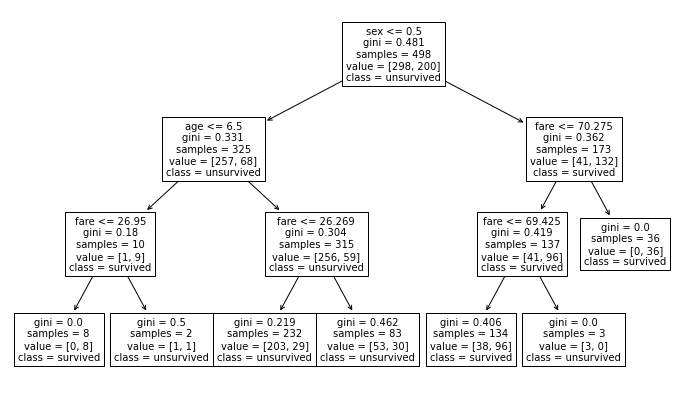

In [125]:
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names= y_train_str.unique())
plt.show()

In [126]:
tree.score(X_train, y_train)

0.8032128514056225

In [127]:
predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        81
           1       0.68      0.77      0.72        44

    accuracy                           0.79       125
   macro avg       0.77      0.79      0.78       125
weighted avg       0.80      0.79      0.79       125



In [128]:
predictions = tree.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       170
           1       0.73      0.70      0.72        98

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [129]:
pd.DataFrame(classification_report(actual, predictions,
                      output_dict=True)).T

,precision,recall,f1-score,support
0,0.833333,0.852941,0.843023,170.000000
1,0.734043,0.704082,0.718750,98.000000
accuracy,0.798507,0.798507,0.798507,0.798507
macro avg,0.783688,0.778511,0.780887,268.000000
weighted avg,0.797026,0.798507,0.797580,268.000000


## Question 6, Which model performs better on your in-sample data?

Model 2 performance better on my in-sample data. 0.80

## Question 7, Which model performs best on your out-of-sample data, the validate set?



Model 2 performance better on my out of sample data, the validate set. 0.79

# Random Forest Exercises

### Question 1: Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

**Train Model
Create the object**

In [130]:
# create the classifier object
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10,min_samples_leaf=1,random_state=1349)

In [ ]:
X = df[['age', 'fare','sex']]
y = df.survived

**Fit the model**

Fit the random forest algorithm to the training data.

In [131]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1349)

**Feature Importance**

Evaluate importance, or weight, of each feature.

The higher number the feature importance == more important the feature.

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.

In [132]:
print(rf.feature_importances_)

[0.31135902 0.38697552 0.30166546]


**Make Predictions**

Classify each flower by its estimated species.



In [133]:
y_pred = rf.predict(X_train)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Estimate Probability**

Estimate the probability of outcome, using the training data.



In [134]:
y_pred_proba = rf.predict_proba(X_train)

### Question 2: Evaluate your results using the model score, confusion matrix, and classification report.

### Question 3: Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

**Evaluate Model**

Compute the Accuracy

In [135]:
rf.score(X_train, y_train)

0.9337349397590361

**Create a confusion matrix**

In [136]:
print(confusion_matrix(y_train, y_pred))

[[288  10]
 [ 23 177]]


In [137]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       298
           1       0.95      0.89      0.91       200

    accuracy                           0.93       498
   macro avg       0.94      0.93      0.93       498
weighted avg       0.93      0.93      0.93       498



In [138]:
rf.score(X_validate, y_validate)

0.792

### Question 4, Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [139]:
max_depth = 10
min_samples_leaf = 1 
metrics = []

for i in range(1,max_depth):
    depth = max_depth - i
    n_samples = i
    rf = RandomForestClassifier(max_depth = depth,
                            min_samples_leaf = n_samples,
                            random_state=1349)
    rf.fit(X_train, y_train)
    in_sample_accuracy = rf.score(X_train, y_train)
    metrics.append(in_sample_accuracy)
    
metrics


[0.9176706827309237,
 0.8835341365461847,
 0.8514056224899599,
 0.8192771084337349,
 0.8032128514056225,
 0.7991967871485943,
 0.7951807228915663,
 0.7971887550200804,
 0.7550200803212851]

In [140]:
max_depth = 11
score = []

for i in range(2, max_depth):
    depth = max_depth - i
    sample_size = i
    
    rf = RandomForestClassifier(max_depth=depth,
                                min_samples_leaf = sample_size,
                                random_state=1349)
    rf.fit(X_train, y_train)

    in_sample = rf.score(X_train, y_train)
    out_of_sample = rf.score(X_validate, y_validate)
    
    output = {"max_depth" :depth, 
              "sample_leaf" : sample_size, 
              "in_sample_accuracy" :in_sample.round(2),
              "out_of_sample_accuracy":out_of_sample.round(2),
             }
    
    score.append(output)
   
df = pd.DataFrame(score)
df

,max_depth,sample_leaf,in_sample_accuracy,out_of_sample_accuracy
0,9,2,0.90,0.81
1,8,3,0.87,0.79
2,7,4,0.84,0.78
3,6,5,0.82,0.79
4,5,6,0.81,0.79
5,4,7,0.80,0.79
6,3,8,0.80,0.78
7,2,9,0.79,0.78
8,1,10,0.75,0.79


### Question 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [141]:
df.sort_values(by='in_sample_accuracy', ascending=False).head(1)

,max_depth,sample_leaf,in_sample_accuracy,out_of_sample_accuracy
0,9,2,0.9,0.81


In [142]:
df.sort_values(by='out_of_sample_accuracy', ascending=False).head(1)

,max_depth,sample_leaf,in_sample_accuracy,out_of_sample_accuracy
0,9,2,0.9,0.81


With max_depth = 9 and sample_leaf =2, performs the best in both in sample dataset and our of sample dataset, with an accuracy of 0.9 and 0.81,its increase a lot from only performs 1 descion tree model. In RF, ecision trees are created so that rather than selecting optimal split points, suboptimal splits are made by introducing randomness. The models created for each sample of the data are therefore more different than they otherwise would be, but still accurate in their unique and different ways. 

**Run the model on test dataset use max_depth = 9 and sample_leaf =2**

In [145]:
rf = RandomForestClassifier(max_depth = 9,
                            min_samples_leaf = 2,
                            random_state=1349)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.8955823293172691

In [146]:
rf.score(X_test, y_test)

0.7947761194029851

**The test dataset recived a score of 0.79 accurancy**